In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

# EDA and Data Cleaning

In [2]:
md = pd.read_csv("hotel_bookings.csv")
md

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Identifying percentage of null/missing values from each features. I see missing values in columns like - Children - 0.003%, country-0.4%, agent -13%, Company- 94%. Hence will drop rows with NA values for Children and Country & drop columns for Agent and company. This will impact the dataset in the least way possible before correleating the columns that impact the outcome and clean data further.

In [3]:
round(100*md.isna().sum()/119390,3)
#119390 is the total number of records as identified in the previous cell. 

hotel                              0.000
is_canceled                        0.000
lead_time                          0.000
arrival_date_year                  0.000
arrival_date_month                 0.000
arrival_date_week_number           0.000
arrival_date_day_of_month          0.000
stays_in_weekend_nights            0.000
stays_in_week_nights               0.000
adults                             0.000
children                           0.003
babies                             0.000
meal                               0.000
country                            0.409
market_segment                     0.000
distribution_channel               0.000
is_repeated_guest                  0.000
previous_cancellations             0.000
previous_bookings_not_canceled     0.000
reserved_room_type                 0.000
assigned_room_type                 0.000
booking_changes                    0.000
deposit_type                       0.000
agent                             13.686
company         

In [4]:
# Eliminating "Company" & "Agent" columns altogether.
md=md.drop(['company', 'agent'], axis=1)

#Dropping just the rows with null values in "Children" and "Company"
md=md.dropna()

Re-identifying % null values from each features, no null values now present

In [5]:
round(100*md.isna().sum()/119390,3)

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr                               0.0
required_car

In [6]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [7]:
## convert datatype of these columns from float to integer
md[['children', 'adr']] = md[['children', 'adr']].astype('int64')

Given the aim is to understand how different factors would impact the rate of cancellation of the hotel bookings, the target variable is 'is_canceled' and that is being reshuffled as the first column. Metadata indicates that '1' is cancelled and '0' is not cancelled. 

In [8]:
cols = list(md.columns)
cols[0], cols[1] = cols[1], cols[0]
cols
md=md.reindex(columns=cols)
md

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-01
1,0,Resort Hotel,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-01
2,0,Resort Hotel,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75,0,0,Check-Out,2015-07-02
3,0,Resort Hotel,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75,0,0,Check-Out,2015-07-02
4,0,Resort Hotel,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,City Hotel,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96,0,0,Check-Out,2017-09-06
119386,0,City Hotel,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225,0,2,Check-Out,2017-09-07
119387,0,City Hotel,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157,0,4,Check-Out,2017-09-07
119388,0,City Hotel,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104,0,0,Check-Out,2017-09-07


# Data Visualization

## ⦿ Annual booking trends: Month-by-month basis

C:\Users\radhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\radhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


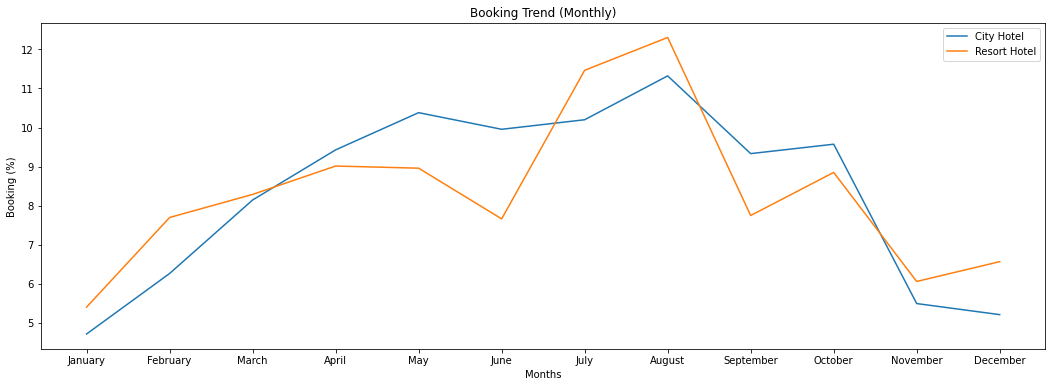

In [9]:
## Order of months- needs to be amended
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']


## Selecting only City Hotel
sorted_months = md.loc[md.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100


## Select only Resort Hotel
sorted_months = md.loc[md.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100


## Draw the line plot

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')


sns.lineplot(x1, y1.values, label='City Hotel', sort=False)
sns.lineplot(x1, y2.values, label='Resort Hotel', sort=False)

plt.show()

Inference: The peak booking months are July and August, and at this time, resort hotels being the highest booked in comparison.

In [10]:
#checking for unique values in fields
md.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

## ⦿ Cancellation Percentage in City vs Resort Hotels

Cancelations in resort hotel=  0.27975047984644913
Cancelations in city hotel=  0.4170891024186023
Total bookings in resort hotel=  39596
Total bookings in city hotel=  79302


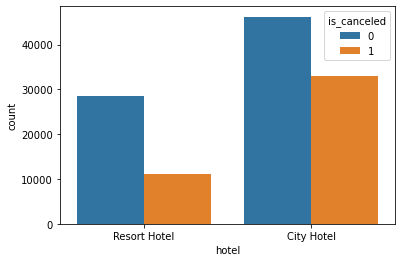

In [11]:
sns.color_palette("PuBuGn", 8)
sns.countplot(data=md, x='hotel', hue='is_canceled')
resort_canceled = md[(md['hotel']=='Resort Hotel') & (md['is_canceled']==1)]
city_canceled = md[(md['hotel']=='City Hotel') & (md['is_canceled']==1)]
print('Cancelations in resort hotel= ', (len(resort_canceled))/(len(md[md['hotel']=='Resort Hotel'])))
print('Cancelations in city hotel= ', (len(city_canceled))/(len(md[md['hotel']=='City Hotel'])))
print('Total bookings in resort hotel= ', (len(md[md['hotel']=='Resort Hotel'])))
print('Total bookings in city hotel= ', (len(md[md['hotel']=='City Hotel'])))

The highest cancellations stem from city hotels compared to resort hotels. At the same time, it is worth noting that the bookings is overall higher in city hotels too. Will be worth comparing percentage of cancellations of which all City bookings were cancelled compared to % of resort bookings being cancelled.

## ⦿ Cancellation Percentage - New Vs Returning customers

Cancelations among new guests=  0.3788360615855142
Cancelations among old guests=  0.14503415659485025
Number of new guests=  115092
Number of old guests=  3806


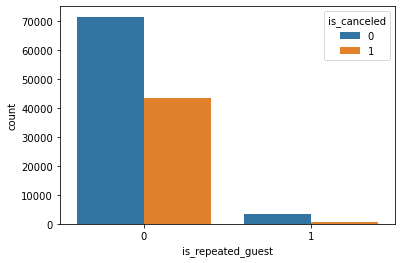

In [12]:
sns.countplot(data=md, x='is_repeated_guest', hue='is_canceled')
new_guest = md[(md['is_repeated_guest']==0) & (md['is_canceled']==1)]
old_guest = md[(md['is_repeated_guest']==1) & (md['is_canceled']==1)]
print('Cancelations among new guests= ', (len(new_guest))/(len(md[md['is_repeated_guest']==0])))
print('Cancelations among old guests= ', (len(old_guest))/(len(md[md['is_repeated_guest']==1])))
print('Number of new guests= ', len(md[md['is_repeated_guest']==0]))
print('Number of old guests= ', len(md[md['is_repeated_guest']==1]))

Inference: Most of the guests are new and also they contribute to maximum % cancelations. 

## ⦿ Cancellation Pattern- Refundable vs Non-Refundable bookings. 

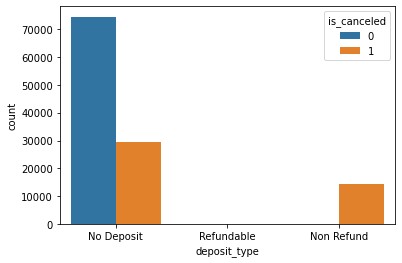

In [13]:
sns.color_palette("afmhot", 8)
sns.countplot(x="deposit_type", hue="is_canceled",data=md);

Inference: Bookings which are non refundable are cancelled, which is bizzare. It might be because of the value of booking cost which the customers are willing to let go instead of paying a premium on the non-deposit category

## ⦿ Annual Booking Quantity by Booking Type

C:\Users\radhi\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


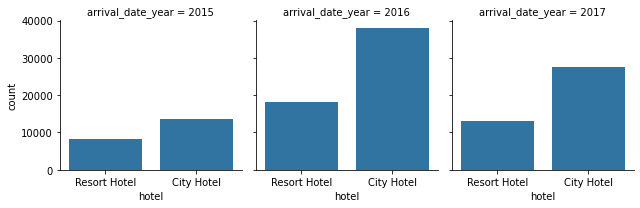

In [14]:
grid = sns.FacetGrid(md, col='arrival_date_year')
grid.map(sns.countplot, 'hotel')

Inference: For all 3 years, city hotels saw more bookings than the resorts. Which adds up because there are more volumes of city hotels that resort hotels. 

## ⦿ Booking Distribution based on Customer Type

In [15]:
print("TABLE 1")
print(md.groupby(['hotel', 'customer_type']).size())

TABLE 1
hotel         customer_type  
City Hotel    Contract            2300
              Group                292
              Transient          59382
              Transient-Party    17328
Resort Hotel  Contract            1776
              Group                278
              Transient          29792
              Transient-Party     7750
dtype: int64


Inference: For each type of hotel, transient type customers make highest bookings.

## ⦿ Identifying Customer Type and Distribution Segment with highest booking traction

In [16]:
print(md.groupby(['customer_type', 'distribution_channel']).size())
print("-"*60)
print(md.groupby(['customer_type', 'market_segment']).size())

customer_type    distribution_channel
Contract         Corporate                  27
                 Direct                     19
                 TA/TO                    4030
Group            Corporate                  31
                 Direct                    114
                 TA/TO                     425
Transient        Corporate                3980
                 Direct                  12197
                 GDS                       193
                 TA/TO                   72803
                 Undefined                   1
Transient-Party  Corporate                2453
                 Direct                   2153
                 TA/TO                   20472
dtype: int64
------------------------------------------------------------
customer_type    market_segment
Contract         Complementary         2
                 Corporate            22
                 Direct               14
                 Groups              735
                 Offline TA/TO    

Inference:

Table 1 Inference, Most customers booking through TA/TO Channel.                          
Table 2 Inference, Most customers use the market segments- Offline TA/TO and online TA to make bookings

The company can use the above inference to make necessary marketing and sales strategies to improve booking revenue.

## ⦿ Identify Key Customers for Business based on Customer Group 

In [17]:
group = md.groupby(['customer_type', 'reservation_status']).size()
group_pcts = group.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
group_pcts

customer_type    reservation_status
Contract         Canceled              30.323847
                 Check-Out             69.038273
                 No-Show                0.637880
Group            Canceled               9.473684
                 Check-Out             89.824561
                 No-Show                0.701754
Transient        Canceled              39.817660
                 Check-Out             59.113643
                 No-Show                1.068697
Transient-Party  Canceled              24.535449
                 Check-Out             74.587288
                 No-Show                0.877263
dtype: float64

Inference:

Most bookings sucess flows through Group, followed by Transient Party

The company can focus its efforts to impact these categories through marketing for increased revenue, conversly also focus efforts to impact better on Transient and contract customers who have the highest canceled %

## ⦿ Top 5 Countries of Origination of Customers. 

In [18]:
country = md.groupby(['country']).count().sort_values('is_canceled',ascending=False).head(5)
country= country.rename(columns={'is_canceled' : 'Count'})
country[['Count']]

,Count
country,
PRT,48586
GBR,12129
FRA,10415
ESP,8568
DEU,7287


Inference: Most booking traffic comes from these top 5 countries

## ⦿ Successful Distribution Channels for the above top 5 countries.

C:\Users\radhi\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


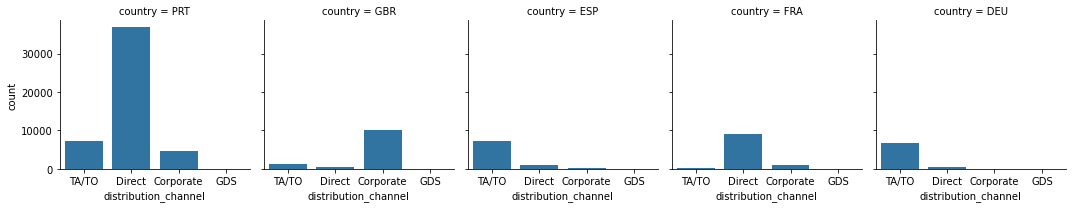

In [19]:
temp = md.loc[(md['country']=='PRT') | (md['country']=='GBR') | (md['country']=='FRA') | (md['country']=='ESP') | (md['country']=='DEU')]
grid = sns.FacetGrid(temp, col='country')
grid.map(sns.countplot, 'distribution_channel')

Inference: The above data indicates different countries show success across different categories. Eg. in PRT - Direct distrubuiton channel yields more bookings, while in ESP its TA/TO channel. This inference can be leveraged to focus efforts through marketing activities in these specific manners to gain more booking traction and also understand how to save costs by cutting down publicity efforts on the other channels which don't yield business for us. Eg GDS is useless in all these countries.

# Feature Selection through Correlation Check

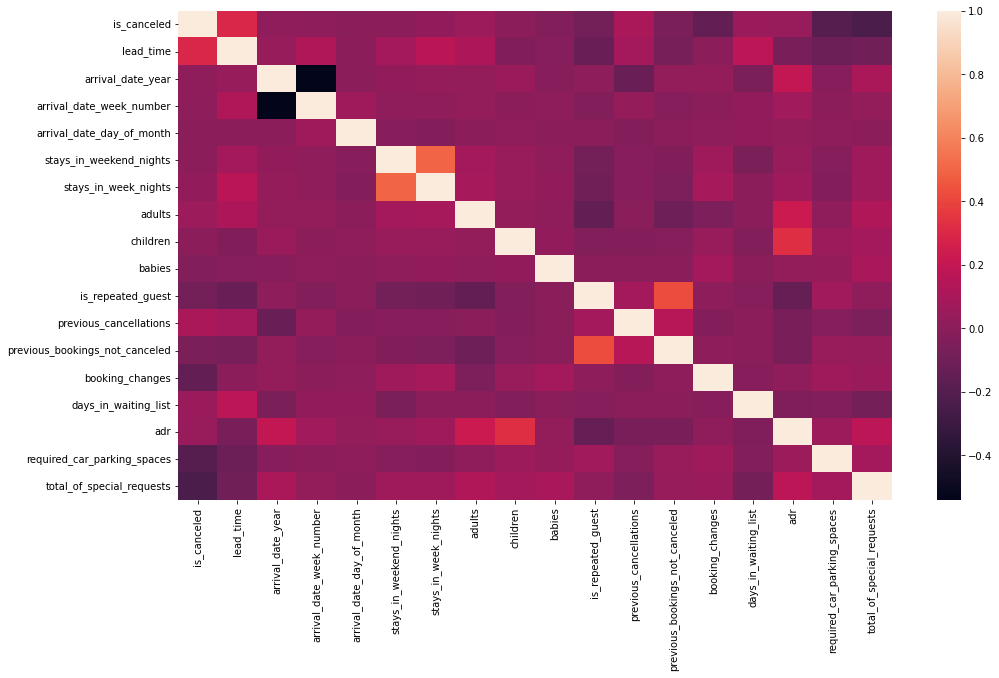

In [20]:
#Using Pearson Correlation to understand features that impact the output the most
plt.figure(figsize=(16, 9)) 
corr_matrix = md.corr()
sns.heatmap(corr_matrix)
plt.show()

The correlation heatmap isn't extremely clear due to the number of variables used, which is why I will proceed with making a correlation matrix and identify top most impactful variables. 

In [21]:
print(md)

print("Correlation Matrix")
corelation=md.corr()
print()

        is_canceled         hotel  lead_time  arrival_date_year  \
0                 0  Resort Hotel        342               2015   
1                 0  Resort Hotel        737               2015   
2                 0  Resort Hotel          7               2015   
3                 0  Resort Hotel         13               2015   
4                 0  Resort Hotel         14               2015   
...             ...           ...        ...                ...   
119385            0    City Hotel         23               2017   
119386            0    City Hotel        102               2017   
119387            0    City Hotel         34               2017   
119388            0    City Hotel        109               2017   
119389            0    City Hotel        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [22]:
a=abs(corelation['is_canceled'])
a.sort_values(ascending=False).head(11)

is_canceled                       1.000000
lead_time                         0.291994
total_of_special_requests         0.235643
required_car_parking_spaces       0.194796
booking_changes                   0.144659
previous_cancellations            0.109922
is_repeated_guest                 0.085179
adults                            0.058381
previous_bookings_not_canceled    0.055493
days_in_waiting_list              0.054016
adr                               0.046571
Name: is_canceled, dtype: float64

Inference: Since the above columns have the highest correlation towards the output "is_canceled", will retain these features alone for the analysis and exclude the rest as those inputs will not exist until a customer checks in.  
This is the simplest model that can be built limiting multi-collinearity as well. 

In [23]:
# creating new dataframe to store for analysis 
md_analysis=md[['is_canceled','hotel','lead_time','total_of_special_requests','required_car_parking_spaces', 'booking_changes', 'previous_cancellations', 'is_repeated_guest','adults', 'previous_bookings_not_canceled','days_in_waiting_list', 'adr']]
md_analysis.head()
md_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   is_canceled                     118898 non-null  int64 
 1   hotel                           118898 non-null  object
 2   lead_time                       118898 non-null  int64 
 3   total_of_special_requests       118898 non-null  int64 
 4   required_car_parking_spaces     118898 non-null  int64 
 5   booking_changes                 118898 non-null  int64 
 6   previous_cancellations          118898 non-null  int64 
 7   is_repeated_guest               118898 non-null  int64 
 8   adults                          118898 non-null  int64 
 9   previous_bookings_not_canceled  118898 non-null  int64 
 10  days_in_waiting_list            118898 non-null  int64 
 11  adr                             118898 non-null  int64 
dtypes: int64(11), object(1)
memory

# Data Balancing

In [24]:
md_analysis.hotel.value_counts()
round(100*md_analysis.hotel.value_counts()/118898,3)

City Hotel      66.698
Resort Hotel    33.302
Name: hotel, dtype: float64

The Data Imbalance for the predictor is moderate at best and would not require Data Balancing techniques for correction. Further, models like Decision Tree and Random Forest are good at correcting this minor imbalance thanks to the splitting rules these use to work on the class variables that generate these trees. 
https://www.researchgate.net/post/What_is_the_exact_data_sample_ratio_of_every_classes_to_declare_a_dataset_suffering_from_a_slight_severe_class_imbalance_problem was specifically helpful to arrive at this decision. 

# One-Hot Encoding

In [25]:
#One-hot encoding 
md_analysis = pd.get_dummies(md_analysis, columns = ['hotel'])
print(md_analysis.columns)

Index(['is_canceled', 'lead_time', 'total_of_special_requests',
       'required_car_parking_spaces', 'booking_changes',
       'previous_cancellations', 'is_repeated_guest', 'adults',
       'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr',
       'hotel_City Hotel', 'hotel_Resort Hotel'],
      dtype='object')


In [26]:
md_analysis.head()

,is_canceled,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,is_repeated_guest,adults,previous_bookings_not_canceled,days_in_waiting_list,adr,hotel_City Hotel,hotel_Resort Hotel
0,0,342,0,0,3,0,0,2,0,0,0,0,1
1,0,737,0,0,4,0,0,2,0,0,0,0,1
2,0,7,0,0,0,0,0,1,0,0,75,0,1
3,0,13,0,0,0,0,0,1,0,0,75,0,1
4,0,14,1,0,0,0,0,2,0,0,98,0,1


In [27]:
md_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   is_canceled                     118898 non-null  int64
 1   lead_time                       118898 non-null  int64
 2   total_of_special_requests       118898 non-null  int64
 3   required_car_parking_spaces     118898 non-null  int64
 4   booking_changes                 118898 non-null  int64
 5   previous_cancellations          118898 non-null  int64
 6   is_repeated_guest               118898 non-null  int64
 7   adults                          118898 non-null  int64
 8   previous_bookings_not_canceled  118898 non-null  int64
 9   days_in_waiting_list            118898 non-null  int64
 10  adr                             118898 non-null  int64
 11  hotel_City Hotel                118898 non-null  uint8
 12  hotel_Resort Hotel              118898 non-n

# Data scaling/ Normalization

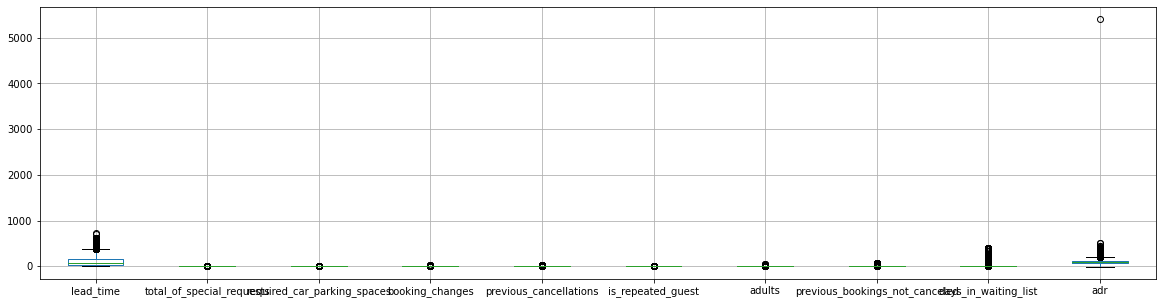

In [28]:
pltcol= ['lead_time','total_of_special_requests','required_car_parking_spaces', 'booking_changes', 'previous_cancellations', 'is_repeated_guest','adults', 'previous_bookings_not_canceled','days_in_waiting_list', 'adr']
boxplot = md_analysis.boxplot(column=pltcol, figsize=(20,5), rot=0)

The fields are visibly on different scales and will need to be normalized. 

In [29]:
# splitting columns based on datatypes to work on each dataframe separately, objects and numerical colums will be grouped separately. 
col_num=['lead_time','total_of_special_requests','required_car_parking_spaces', 'booking_changes', 'previous_cancellations', 'is_repeated_guest','adults', 'previous_bookings_not_canceled','days_in_waiting_list', 'adr', 'hotel_City Hotel', 'hotel_Resort Hotel']

In [30]:
#defining the new split object and numerical column. This way I can scale the numerical colums easily. 
md_num=md_analysis[col_num]

In [31]:
# apply Z scale normalization techniques
for column in md_num.columns:
    md_num[column] = (md_num[column] -
                           md_num[column].mean()) / md_num[column].std()    

display(md_num.head())

<ipython-input-31-9db7d446731e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_num[column] = (md_num[column] -
<ipython-input-31-9db7d446731e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_num[column] = (md_num[column] -
<ipython-input-31-9db7d446731e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,is_repeated_guest,adults,previous_bookings_not_canceled,days_in_waiting_list,adr,hotel_City Hotel,hotel_Resort Hotel
0,2.223398,-0.721205,-0.253448,4.256867,-0.103021,-0.181849,0.244754,-0.088662,-0.1322,-2.016861,-1.415189,1.415189
1,5.918325,-0.721205,-0.253448,5.788764,-0.103021,-0.181849,0.244754,-0.088662,-0.1322,-2.016861,-1.415189,1.415189
2,-0.910275,-0.721205,-0.253448,-0.338827,-0.103021,-0.181849,-1.483629,-0.088662,-0.1322,-0.530939,-1.415189,1.415189
3,-0.854150,-0.721205,-0.253448,-0.338827,-0.103021,-0.181849,-1.483629,-0.088662,-0.1322,-0.530939,-1.415189,1.415189
4,-0.844796,0.540341,-0.253448,-0.338827,-0.103021,-0.181849,0.244754,-0.088662,-0.1322,-0.075256,-1.415189,1.415189


In [32]:
#Creating new master data from merged and normalized datasets
hotelcancellationpred=pd.concat([md_analysis['is_canceled'],md_num],axis=1)

In [33]:
hotelcancellationpred.head()

,is_canceled,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,is_repeated_guest,adults,previous_bookings_not_canceled,days_in_waiting_list,adr,hotel_City Hotel,hotel_Resort Hotel
0,0,2.223398,-0.721205,-0.253448,4.256867,-0.103021,-0.181849,0.244754,-0.088662,-0.1322,-2.016861,-1.415189,1.415189
1,0,5.918325,-0.721205,-0.253448,5.788764,-0.103021,-0.181849,0.244754,-0.088662,-0.1322,-2.016861,-1.415189,1.415189
2,0,-0.910275,-0.721205,-0.253448,-0.338827,-0.103021,-0.181849,-1.483629,-0.088662,-0.1322,-0.530939,-1.415189,1.415189
3,0,-0.854150,-0.721205,-0.253448,-0.338827,-0.103021,-0.181849,-1.483629,-0.088662,-0.1322,-0.530939,-1.415189,1.415189
4,0,-0.844796,0.540341,-0.253448,-0.338827,-0.103021,-0.181849,0.244754,-0.088662,-0.1322,-0.075256,-1.415189,1.415189


## Test-Train Split

In [34]:
# Splitting  data into Train and test set

train_var = hotelcancellationpred.drop(['is_canceled'], axis=1)
test_var = hotelcancellationpred['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(train_var, test_var, test_size=0.20,random_state=2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((95118, 12), (95118,), (23780, 12), (23780,))

In [35]:
#Scaling the train and test input data through standard scaling

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

In [36]:
print(y_train.value_counts())
print('\n')
print('%.2f percent of canceled' %(y_train.mean()*100))
print('%.2f percent of NOT canceled' %(100-(y_train.mean()*100)))

0    59768
1    35350
Name: is_canceled, dtype: int64


37.16 percent of canceled
62.84 percent of NOT canceled


Inference: The above probability of 37% is the baseline threshold. Now, ROC Analysis will confirm this more accurately. 

In [37]:
# Probability threshold determination

#choosing ROC curve 
model = LogisticRegression()
model.fit(X_train,y_train)
pred_prob1 = model.predict_proba(X_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [38]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

0.7866318191358145


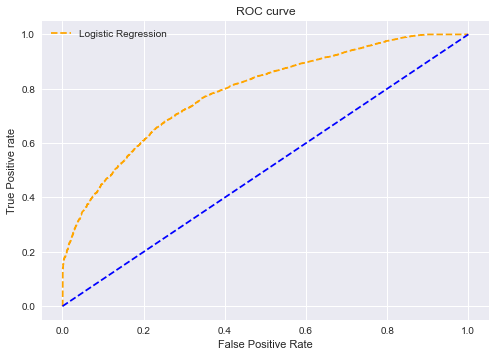

In [39]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [40]:
# Identifying best threshold for the model based on 

optimal_idx = np.argmax(tpr1 - fpr1)
optimal_threshold = thresh1[optimal_idx]
optimal_threshold

0.40070082293402004

Inference: The best probability threshold is indicated to be 0.4 for this model. This is the inital prediction for any new customer, to say there is a 40% chance of it being canceled.

# Models and Results

In [41]:
def ConfusionMatrix(y_test,logreg_pred):
    confusion = metrics.confusion_matrix(y_test, logreg_pred)
    c = pd.DataFrame(confusion, columns=['y_test','logreg_pred'])
    confusion_matrix = pd.crosstab(c['y_test'], c['logreg_pred'], rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion, annot=True,cmap='flare',fmt="d")
    plt.show()
    print(confusion)
    # this is to compare manual accuracy score computation versus what accuracy_score() fn gives. 
    TP = confusion[1, 1]  # True Positives
    TN = confusion[0, 0]  # True Negatives
    FP = confusion[0, 1]  # False Positives
    FN = confusion[1, 0]  # False Negatives
    print("Manual Model Accuracy Score is:")
    print((TP + TN) / (TP + TN + FP + FN))

# Logistic Regression

In [42]:
#logistic regression
start = time.time()

logreg = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)
scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)
logreg_pred = logreg.predict(X_test_mm)
lr_test_accuracy=logreg.score(X_test_mm, y_test)
lr_cv_accuracy=scores.mean()
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("Average cross validation score: {:.3f}".format(scores.mean()))


end = time.time()
lr_time=round(end-start,2)
print(f"Runtime of the program is {end - start}")

Test accuracy: 0.727
Average cross validation score: 0.726
Runtime of the program is 7.156856060028076


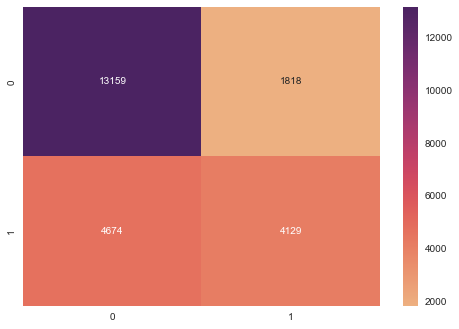

[[13159  1818]
 [ 4674  4129]]
Manual Model Accuracy Score is:
0.7269974768713204


In [43]:
ConfusionMatrix(y_test,logreg_pred)

# K-Nearest Neighbours

In [44]:
#K- Nearest Neighbours
start = time.time()

error = []
from sklearn.neighbors import KNeighborsClassifier

# Calculating error for K values between 1 and 40
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

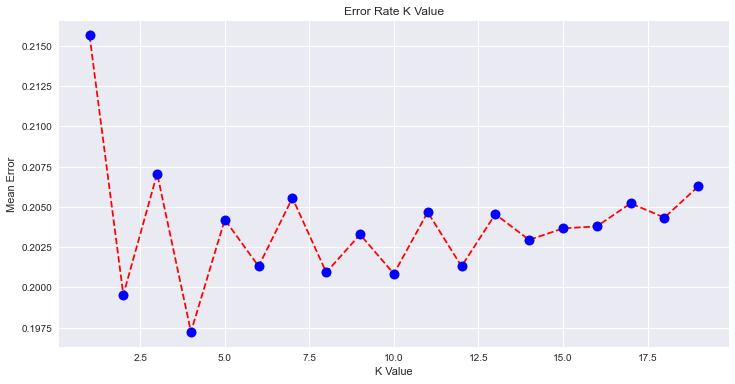

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Inference: from the above, Least error at k=4, so this can be used. 

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
knn_test_accuracy=0.76
knn_cv_accuracy=scores.mean()
scores = cross_val_score(knn, X_train, y_train, cv=5)

end = time.time()

print("Average cross validation score: {:.3f}".format(scores.mean()))
knn_time=round(end-start,2)
print(f"Runtime of the program is {end - start}")

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     14977
           1       0.81      0.61      0.70      8803

    accuracy                           0.80     23780
   macro avg       0.80      0.76      0.78     23780
weighted avg       0.80      0.80      0.80     23780

Average cross validation score: 0.794
Runtime of the program is 617.4664604663849


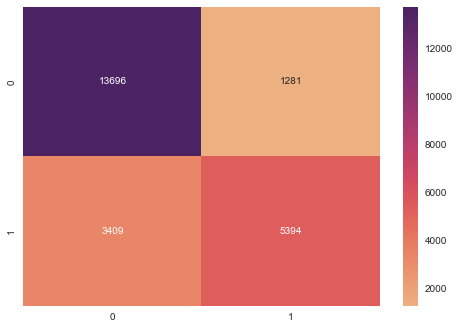

[[13696  1281]
 [ 3409  5394]]
Manual Model Accuracy Score is:
0.8027754415475189


In [47]:
ConfusionMatrix(y_test,y_pred)

Inference: 80% accuracy for K=4 which is the highest value

# Decision Tree Analysis

In [48]:
# Decision Tree Analysis:

start = time.time()

tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5)
tree_pred = tree.predict(X_test)
dt_test_accuracy=tree.score(X_test, y_test)
dt_cv_accuracy=tree.score(X_test, y_test)

end = time.time()

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
dt_time=round(end-start,2)
print(f"Runtime of the program is {end - start}")

Average cross validation score: 0.628
Test accuracy: 0.630
Runtime of the program is 0.4213526248931885


# Random forest

In [49]:
# Random forest

start = time.time()

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

#Create an instance of Random Forest Classifier
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)
# Fit the model
forest.fit(X_train, y_train)
 
# Measure model performance
y_pred = forest.predict(X_test)
rf_test_accuracy=accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

end = time.time()
rf_time=round(end-start,2)
print(f"Runtime of the program is {end - start}")

Accuracy: 0.800
Runtime of the program is 0.5632164478302002


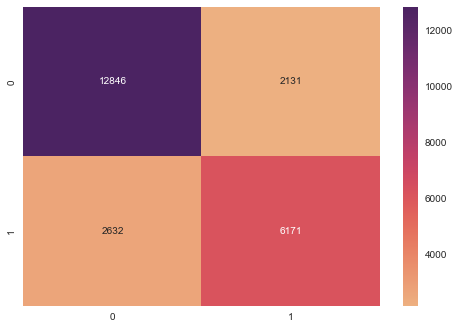

[[12846  2131]
 [ 2632  6171]]
Manual Model Accuracy Score is:
0.7997056349873843


In [50]:
ConfusionMatrix(y_test,y_pred)

# Artifical Neural Networks

In [51]:
# Artifical Neural Networks

start = time.time()

neuralnetwork = MLPClassifier()
# Fit the model
neuralnetwork.fit(X_train, y_train)
 
# Measure model performance
y_pred = neuralnetwork.predict(X_test)
neuralnetwork_test_accuracy=accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

end = time.time()
neuralnetwork_time=round(end-start,2)
print(f"Runtime of the program is {end - start}")

Accuracy: 0.771
Runtime of the program is 88.7960991859436


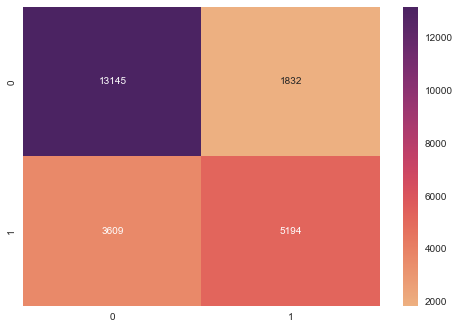

[[13145  1832]
 [ 3609  5194]]
Manual Model Accuracy Score is:
0.7711942809083263


In [52]:
ConfusionMatrix(y_test,y_pred)

In [60]:
# initialize list of models for comparison
data = [['Logistic Regression', lr_test_accuracy, lr_cv_accuracy, lr_time], ['KNN', knn_test_accuracy, knn_cv_accuracy, knn_time], ['Decision Tree', dt_test_accuracy, dt_cv_accuracy, dt_time], ['Random Forest', rf_test_accuracy, 'NA', rf_time], ['Artificial Neural Network', neuralnetwork_test_accuracy, 'NA', neuralnetwork_time]]
  
# Create the pandas DataFrame
allmodels = pd.DataFrame(data, columns = ['Model Name', 'Accuracy','Cross Validation','Run time'])
allmodels= allmodels.round(decimals=2)
# print dataframe.
allmodels

,Model Name,Accuracy,Cross Validation,Run time
0,Logistic Regression,0.73,0.726266,7.16
1,KNN,0.76,0.726266,617.47
2,Decision Tree,0.63,0.629815,0.42
3,Random Forest,0.80,NA,0.56
4,Artificial Neural Network,0.77,NA,88.80


# Model Comparison and Summary

In [61]:
allmodels.sort_values('Accuracy', ascending = False )

,Model Name,Accuracy,Cross Validation,Run time
3,Random Forest,0.80,NA,0.56
4,Artificial Neural Network,0.77,NA,88.80
1,KNN,0.76,0.726266,617.47
0,Logistic Regression,0.73,0.726266,7.16
2,Decision Tree,0.63,0.629815,0.42


In [62]:
#comparison of all models
allmodels.sort_values('Run time', ascending = True )

,Model Name,Accuracy,Cross Validation,Run time
2,Decision Tree,0.63,0.629815,0.42
3,Random Forest,0.80,NA,0.56
0,Logistic Regression,0.73,0.726266,7.16
4,Artificial Neural Network,0.77,NA,88.80
1,KNN,0.76,0.726266,617.47


# Final selection of model to use and Prediction Accuracy
Based on Run time of models, highest time taken is by KNN method which is 617 seconds and this doesnt have the highest model accuracy of all either. Least time is from Decision Tree in .42 seconds but the model accuracy is poor at 63%.
I would choose the Random Forest Model with it 80% accuracy of prediction and runtime highly comparable to that of the Decision Tree Model. 